# Extracting Text Features 

In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.wsd import lesk

from googletrans import Translator

import re
import nltk
import googletrans
import string
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

A:\ProgramFiles\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


Populating the interactive namespace from numpy and matplotlib


In [2]:
# read from csv
comments = pd.read_csv("../output/malindoairmalaysia_facebook_comments.csv")
print(comments)
print(len(comments))

                             comment_id                         status_id  \
0     1606251622792328_1606462326104591  366428100108026_1606251622792328   
1     1606251622792328_1606481609435996  366428100108026_1606251622792328   
2     1601446039939553_1605176639566493  366428100108026_1601446039939553   
3     1601446039939553_1605338469550310  366428100108026_1601446039939553   
4     1601446039939553_1606462666104557  366428100108026_1601446039939553   
5     1601441176606706_1606462949437862  366428100108026_1601441176606706   
6     1600296580054499_1603093346441489  366428100108026_1600296580054499   
7     1600296580054499_1604472999636857  366428100108026_1600296580054499   
8     1600296580054499_1606155132801977  366428100108026_1600296580054499   
9     1600296580054499_1606525702764920  366428100108026_1600296580054499   
10    1601400496610774_1602455006505323  366428100108026_1601400496610774   
11    1601400496610774_1602517619832395  366428100108026_1601400496610774   

# Melt paragraphs into sentences by keyword

In [3]:
# instance to remove punctuation such as (!, @, comma, .)
sentence_keyword = '''!".@#$%^&*_~?'''

# list of sentences from paragaphs
sentences = []

# iterate through each row
for idx, row in comments.iterrows():
    
    # remove the prefix from facebook
    curr_sent = row['comment_message'][2:]
    
    # if there is a new line, then replace it with a fullstop, so it will be split into sentences later
    curr_sent = curr_sent.replace('\\n', '.')
    
    # indices of position of all keywords
    indices = [0]
    
    # find the indices of the keyword
    for idx in range(0, len(sentence_keyword)):

        if sentence_keyword[idx] in curr_sent:
            pos = curr_sent.index(sentence_keyword[idx])   
            indices.append(pos)

    # sort the indices
    indices.sort()
    
    # melt the current data frame row into sentences by the indices found previously
    # and remove all of the keywords found within the data
    parts = [curr_sent[i:j] for i,j in zip(indices, indices[1:]+[None])]
    
    # add it into the sentences so we can further proceess
    sentences.extend(parts)

print(len(sentences))

# uncomment to print out the final sentences to be analyze
for sent in sentences:
    print(sent)
    

8134
1)RM0
.00 Malindo OD2305 KBR-KUL (22JUN18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...2)RM0.00 Malindo OD2305 KBR-KUL (02MAY18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...3)RM0.00 Malindo OD2304 KUL-KBR (28APR18) moved to OD2302, 0645hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...
*all my future flight delay about >6hours delay..Dear Malindo Mgmt,  ..Can someone explain about this re-schedule
??  .may i know what compensation i able to get due to your inappropriate planning?'
The worst airline in malaysia
.'
waiting rm250 return like last year
..'
Yup
.. biz class return only 250 to pen/lgk/kbr'
1)RM0
.00 Malindo OD2305 KBR-KUL (22JUN18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...2)RM0.00 Malindo OD2305 KBR

Ok sir
. Thank you very much. Dlm iklan tak nyatakan pulak. Hehe.'
Lawrance Kumar lets go'
Mukhleiss Zakaria acai go'
Zerick Lazaroo'
Tuan Muhd Faim email la
.. we all support u'
Vevye Sue'
Umur ikut bulan 35 kalau ikut tahun 36
...boleh lagi ke'
Farid Zainudin'
Ramp agent keja menda mir'
Untungla Qalbi Qawiem dpt la ular lebih pasni
.. huhu'
Knpa ak, apa dosa ak haha'
Muhamad Farid '
"
Ebal Riz'
Nazeem Eskandar mng awal tahun banyak opening laa'
Prinze Roy why not you try this'
CSurita Yahaya'
sabtu ni boleh la kot'
Muhamad Nur Fitri Muhd Firdaus poeii try \xf0\x9f\x92\x83\xf0\x9f\x8f\xbc'
Mana ada lesen keta\xf0\x9f\x98\xad'
laa tak ambik lagi ke \xf0\x9f\x98\x9e\xf0\x9f\x98\x9e\xf0\x9f\x98\x82'
Nor Afra'
aikkkk
..ni hk kjo d klia key.
???'
Hom
.keyyy'
Khairul Aiman Muhammad Syafiq marii'
Fs Ayuazwa'
Kogilah Mohan'
Tq dear'
Mohan Balaraman'
Gaji rm1200, elaun rm1000 xtermasuk ot
..bg tau siap2'
Info noted'
Noted chip \xf0\x9f\x91\x8c\xf0\x9f\x8f\xbb'
 [[STICKER]]'
Keje sebagai apa tu

Kathy Monck'
Ben Long \xf0\x9f\x98\xa2'
How about flight on this friday
?'
Gemma Hardinge'
tolong baca pm sy
... dan tolong balas email sy... tq'
Vashti Van Putten try sending a message via this page too xx'
Thank u x'
So how if i would like to rebook the ticket
? I still can't speak to your customer service
. Better u give the solution or just give the information details here about how to rebook the ticket.
"
Should cancel all flights to Bali until everything back to normal Mr Malindo
. The mountain going to explode soon.. if Denpasar airport open on the next day, and you keep sending all your passengers to Bali, you will put them in danger.'
If the airport is closed tomorrow and my daughter is due to fly, should she still go to the airport to reschedule
??'
Annette Brauns'
Has anyone received an email from them with any information regards to cancellations and what to do etc or just seen it on the news and on here, I'm assuming you do not have to still turn up to the airport to rece

#### translate all sentences into english

In [4]:
'''
# translate all sentences to english

# translate any foreign languages into english using google translate
translator = Translator()

eng_sentences = []

for sent in sentences:
    try:
        translated = translator.translate(sent, dest='en')
        eng_sentences.append(translated)
    except:
        eng_sentences.append(sent)

        
print(len(eng_sentences))
'''

"\n# translate all sentences to english\n\n# translate any foreign languages into english using google translate\ntranslator = Translator()\n\neng_sentences = []\n\nfor sent in sentences:\n    try:\n        translated = translator.translate(sent, dest='en')\n        eng_sentences.append(translated)\n    except:\n        eng_sentences.append(sent)\n\n        \nprint(len(eng_sentences))\n"

#### write translated text into a file

In [5]:
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file
'''
english_path = open("../output/analysis output/english_sentences.txt", "w", encoding="utf-8")
for sent in eng_sentences:
    try:
        english_path.write(sent.text)
        english_path.write('\n')
    except:
        continue

english_path.close()
'''

'\nenglish_path = open("../output/analysis output/english_sentences.txt", "w", encoding="utf-8")\nfor sent in eng_sentences:\n    try:\n        english_path.write(sent.text)\n        english_path.write(\'\n\')\n    except:\n        continue\n\nenglish_path.close()\n'

#### read from the file

In [6]:
sentences = []

with open("../output/analysis output/english_sentences.txt", "r", encoding="utf-8") as f:
    for line in f:
        sentences.append(line)

print(len(sentences))
print(sentences)

5947
['1) RM0\n', '.00 Malindo OD2305 KBR-KUL (22JUN18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...2)RM0.00 Malindo OD2305 KBR-KUL (02MAY18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...3)RM0.00 Malindo OD2304 KUL-KBR (28APR18) moved to OD2302, 0645hrs.We apologize for any inconvenience caused. Msg sent by Call Centre (+603-78415388 8am-10pm)...\n', '*all my future flight delay about >6hours delay..Dear Malindo Mgmt,  ..Can someone explain about this re-schedule\n', "??  .may i know what compensation i able to get due to your inappropriate planning?'\n", 'The worst airline in malaysia\n', ".'\n", 'waiting rm250 return like last year\n', "..'\n", 'Yup\n', ".. biz class return only 250 to pen/lgk/kbr'\n", '1) RM0\n', '.00 Malindo OD2305 KBR-KUL (22JUN18) moved to OD2303, 0820hrs.We apologize for any inconvenience caused. Msg sent by Call Ce

#### abbreviation replacement and lower case sentence continuing

In [7]:
# potential abbreviations (short form) which should be converted into complete word
abbrevs={'hrs':'hours', 'mgnt':'management', 'msg':'message', 'bagage':'baggage', 
         'lugage':'baggage', 'depart':'departure', 'kul':'kuala lumpur', 'airlines':'malindo air',
        'mgmt':'management', 'luggage':'baggage', 'klia':'airport', 'mohd':'', 'airline':'malindo air',
        'malindo':'malindo air', 'malindoair':'malindo air', 'customer':'customer service', 
         'service':'customer service', 'staff':'customer service', 'crew':'flight service',
        'delay':'flight', 'singapore':'tourism hotspot', 'kuala lumpur':'tourism hotspot', 
         'malaysia':'tourism hotspot', 'bali':'tourism hotspot', 'singapore':'tourism hotspot', 
         'perth':'tourism hotspot', 'sabah':'tourism hotspot', 'hanoi':'tourism hotspot', 
         'vietnam':'tourism hotspot', 'frances':'tourism hotspot', 'promo':'price','year':'',
         'interview':'','money':'price', 'city':'tourism hotspot' ,'date':'','abdul':'',
         'airasia':'','morning':'', 'travel':'malindo air','kite':'',
        'respond':'customer service', 'line':'customer service', 'baby':'family', 'rahman':'', 'tggu':'',
        'experience':'customer service', 'rashid':'', 'check':'', 'press':'', 'days':''}

for idx in range(0, len(sentences)):
    
    # to lower case
    sentences[idx] = sentences[idx].lower()
    
    # replace any abbreviations into its complete form
    for abbrev in abbrevs:
        sentences[idx] = sentences[idx].lower().replace(abbrev,abbrevs[abbrev])

print(len(sentences))
print(sentences)

5947
['1) rm0\n', '.00 malindo air od2305 kbr-tourism hotspot (22jun18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...2)rm0.00 malindo air od2305 kbr-tourism hotspot (02may18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...3)rm0.00 malindo air od2304 tourism hotspot-kbr (28apr18) moved to od2302, 0645hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...\n', '*all my future flight flight about >6hours flight..dear malindo air management,  ..can someone explain about this re-schedule\n', "??  .may i know what compensation i able to get due to your inappropriate planning?'\n", 'the worst malindo air air in tourism hotspot\n', ".'\n", 'waiting rm250 return like last \n', "..'\n", 'yup\n', ".. biz class return only 250 to pen/lgk/kbr'\n", '1) rm0\n', '.00 malindo air od2305 kbr-tourism 

#### remove interrogative and conditional sentences

In [8]:
# remove interrogative and conditional sentences
sentences2 = []

for sent in sentences:
    
    if '?' in sent or 'if' in sent:
        continue
    else:
        sentences2.append(sent)

sentences = sentences2
print(len(sentences))
print (sentences)

5333
['1) rm0\n', '.00 malindo air od2305 kbr-tourism hotspot (22jun18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...2)rm0.00 malindo air od2305 kbr-tourism hotspot (02may18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...3)rm0.00 malindo air od2304 tourism hotspot-kbr (28apr18) moved to od2302, 0645hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...\n', '*all my future flight flight about >6hours flight..dear malindo air management,  ..can someone explain about this re-schedule\n', 'the worst malindo air air in tourism hotspot\n', ".'\n", 'waiting rm250 return like last \n', "..'\n", 'yup\n', ".. biz class return only 250 to pen/lgk/kbr'\n", '1) rm0\n', '.00 malindo air od2305 kbr-tourism hotspot (22jun18) moved to od2303, 0820hours.we apologize for any inconvenience caused. me

#### look at the frequency of noun, so we can see what what should be added into recognized entity list

In [9]:
# given a line of text, tokenize the line and return each word along with its tag
def pos_tagging(line):
    for item in nltk.sent_tokenize(line):
        tokenized = nltk.word_tokenize(item)
        tagged = nltk.pos_tag(tokenized, tagset= "universal")
        return tagged

frequency_table = {}

for sent in sentences:
    tagged_lists = pos_tagging(sent)
    
    if tagged_lists is None:
        continue
    
    for tag in tagged_lists:
        w, word_type = tag
        
        if word_type != 'NOUN':
            continue
        
        if w not in frequency_table:
            frequency_table[w] = 0
        
        frequency_table[w] = frequency_table[w] + 1

        
sorted_keys = sorted(frequency_table, key=frequency_table.get, reverse = True)

for key in sorted_keys:
    print(key + " , " + str(frequency_table[key]))

\ , 1668
air , 545
malindo , 292
] , 268
x9f , 262
xf0 , 244
hotspot , 230
tourism , 217
i , 215
flight , 205
customer , 202
x98 , 189
.. , 168
service , 167
[ , 150
price , 96
jom , 84
xe0 , 79
xb8 , 78
sticker , 70
la , 59
x82 , 58
airport , 56
ticket , 53
baggage , 49
x8d , 47
flights , 45
ni , 44
x , 44
time , 41
book , 37
hahaha , 36
x8f , 35
tu , 34
hi , 34
g , 34
please , 32
photo , 31
try , 30
class , 29
je , 29
xa4 , 28
haha , 27
_image_share , 26
way , 26
business , 25
email , 25
number , 24
xe5 , 23
xb9 , 22
p , 21
thanks , 21
pm , 20
tan , 20
return , 19
hours , 19
day , 18
lg , 18
kl , 18
lah , 18
lee , 18
x88 , 18
xef , 18
ok , 18
ho , 17
hahahaha , 17
x92 , 17
xe2 , 17
tickets , 16
tgk , 16
x91 , 16
x84 , 16
x99 , 16
xa1 , 16
x80 , 16
congratulations , 16
refund , 16
thank , 15
contest , 15
plane , 14
dah , 14
ko , 14
month , 14
da , 14
nk , 14
ismail , 14
muhammad , 14
y , 14
siti , 14
someone , 13
address , 13
\xf0\x9f\x98\x82 , 13
cabin , 13
ali , 13
tp , 13
murah , 1

morgan , 1
sakinah , 1
rz , 1
mummy , 1
yantie , 1
recommend , 1
//m , 1
.facebook.com/story.php , 1
_fbid , 1
id=100001200616505 , 1
flyer , 1
..sent , 1
tour , 1
port , 1
counter..had , 1
security , 1
pay , 1
reimbursement.when , 1
guat , 1
reviews , 1
\xf0\x9f\x98\xa1\xf0\x9f\x98\xa1\xf0\x9f\x98\xa1\xf0\x9f\x98\xa1 , 1
jadi , 1
nightmare , 1
legs , 1
hafizah , 1
tukiran , 1
buvanesvary , 1
dint , 1
chat , 1
guitar , 1
destroyed , 1
belinda , 1
value , 1
nader , 1
jahra , 1
gorge , 1
sri , 1
lanka , 1
orders , 1
side , 1
winter , 1
solstice , 1
assist , 1
arrival , 1
inform , 1
communication , 1
sense , 1
managers , 1
shannon , 1
denise , 1
leach , 1
cousin , 1
trent , 1
\xe2\x9d\xa4 , 1
..stop , 1
center , 1
.35am , 1
fellow , 1
flyers , 1
tee , 1
judy , 1
片 , 1
dharma , 1
dave , 1
nagandran , 1
ticketing , 1
airambassador , 1
type , 1
.hahahahaha , 1
hahahahah , 1
boboi , 1
cak , 1
sheikh , 1
mahsin , 1
criminal , 1
azzam , 1
mind , 1
pliz , 1
sygggggggg , 1
die , 1
sept , 1
syg , 

#### first layer entity recognition define strict recognized entity list

In [10]:
recognized_entities = ['kuala lumpur', 'malindo air', 'customer service', 'tourism hotspot', 'malindo', 'airport', 'service', 
                       'airline', 'staff', 'baggage', 'malaysia', 'boarding', 
                       'class', 'journey', 'departure',
                      'route', 'festival', 'flight', 'book', 'bali', 'customer', 'crew']

sentence_clusters = []

#### first layer NER - strict entity lexicons

In [32]:
# keep a list of sentences that has not yet been recognized
no_entity_sentences = []

for idx in range(0, len(sentences)):

    for re in recognized_entities:
        if re in sentences[idx]:
            sentence_clusters.append({'entity':re, 'sentence':sentences[idx]}) 
            
            continue
    
    no_entity_sentences.append(sentences[idx])

for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence : 00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm
entity : malindo air	 sentence : all my future     about 6hours  dear   management  can someone explain about this reschedule
entity : malindo air	 sentence : the worst   air in  
entity : class	 sentence :  biz   return only 250 to penlgkkbr
entity : malindo air	 sentence : this is the only   air which do not serve liquor
entity : malindo air	 sentence : this is the only   air who always became late
entity : class	 sentence : why the price of business   price ni i search not meet
entity : malindo air	 sentence :  please   fix this thi

entity : malindo air	 sentence : .....do not trust this malindo air air

entity : malindo	 sentence : .....do not trust this malindo air air

entity : customer service	 sentence : ! appalling customer customer service customer service as well as false advertising and false promises to customer customer services!! they refuse to pay refunds that they previously agreed to pay and then refuse to help you and blatantly ignore any emails when trying to sort this out.'

entity : service	 sentence : ! appalling customer customer service customer service as well as false advertising and false promises to customer customer services!! they refuse to pay refunds that they previously agreed to pay and then refuse to help you and blatantly ignore any emails when trying to sort this out.'

entity : customer	 sentence : ! appalling customer customer service customer service as well as false advertising and false promises to customer customer services!! they refuse to pay refunds that they previously 

#### second layer NER - nltk.ne_chunk, named entity chunk

In [12]:
# define a method to iterate through the nouns with nltk.ne_chunk
# iterate throughs the trees, subtrees and leaves to construct a word
def NER(line):
    
    recognized_entities = []
    for item in nltk.sent_tokenize(line):
        
        tagged = nltk.pos_tag(nltk.word_tokenize(item))
        chunks = nltk.ne_chunk(tagged)
        
        entities = []
        for tag in tagged:
            w, w_type = tag
            if w_type not in entities and 'NN' in w_type:
                entities.append(w)
        
        for x in chunks.subtrees():
            for y in x.subtrees():
                
                entity = []
                for ent in y.leaves():
                    word, w_type = ent
                    
                    if word in entities:
                        entity.append(word)
                
                curr_word = ' '.join([x for x in entity])
                
                if curr_word not in recognized_entities:
                    recognized_entities.append(curr_word)
                
    if len(recognized_entities) > 0:
        recognized_entities = recognized_entities[1:len(recognized_entities)-1]
    
    return recognized_entities

no_entity_sentences2 = []

for idx in range(0, len(no_entity_sentences)):
    
    res = NER(no_entity_sentences[idx])
    if len(res) is not 0:
        sentence_clusters.append({'entity':res[0], 'sentence':no_entity_sentences[idx]}) 
        continue
        
    no_entity_sentences2.append(no_entity_sentences[idx])

no_entity_sentences = no_entity_sentences2

for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence : .00 malindo air od2305 kbr-tourism hotspot (22jun18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...2)rm0.00 malindo air od2305 kbr-tourism hotspot (02may18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...3)rm0.00 malindo air od2304 tourism hotspot-kbr (28apr18) moved to od2302, 0645hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...

entity : tourism hotspot	 sentence : .00 malindo air od2305 kbr-tourism hotspot (22jun18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...2)rm0.00 malindo air od2305 kbr-tourism hotspot (02may18) moved to od2303, 0820hours.we apologize for any inconvenience caused. message sent by call centre (+603-78415388 8am-10pm)...3)rm0.00 malindo air od

#### third layer NER - part to speech using nltk.pos, extract only the noun

In [13]:
# given a line of text, tokenize the line and return each word along with its tag
def pos_tagging(line):
    for item in nltk.sent_tokenize(line):
        tokenized = nltk.word_tokenize(item)
        tagged = nltk.pos_tag(tokenized, tagset= "universal")
        return tagged

no_entity_sentences2 = []

for idx in range(0, len(no_entity_sentences)):
    
    tags = pos_tagging(no_entity_sentences[idx])
    
    if tags is None:
        continue
    
    flag = False
    
    
    for tag in tags:
        
        word, word_t = tag
        
        if word_t == 'NOUN':
            print(word)
            sentence_clusters.append({'entity':word, 'sentence':no_entity_sentences[idx]}) 
            flag = True
            break
    
    continue
    if flag is True:
        break
    
    no_entity_sentences2.append(no_entity_sentences[idx])

no_entity_sentences = no_entity_sentences2
for cluster in sentence_clusters:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

rm0
flight
malindo
return
..
yup
biz
rm0
flight
rm0
flight
malindo
malindo
price
please
malindo
mohon
i
brother
al
rizaid
joel
haha
time
companion
vivegananthan
fai
dream
xf0
antony
azrul
advice
arrangements
jokers
flight
prendergast
flight
flight
alvin
xf0
touch
_care
malindo
addition
hello
touch
successes
hello
touch
reservations
neuf.fr.i
_care
price
malindo
comment
..
zahid
izzati
malindo
complaint
ticket
hi
od206.seat
ticket
malindo
customer
malindo
reply
aienz
som.acik
jom
liau
zahirah
gi
mat
baratahi
muhd
tourism
binti
thomas
malindo
.hahahaha
[
ros
elissa
azra
tadi
hahahah
word
yang
aqilah
ct
malindo
hi
dals
week
economy
return
lui
bandung
g
ride
hahahah
zmyry
ada
yup
flight
kojaqqq
klarice
height
ziera
carocustomer
wow
dtg
yusof
bt
.right
madihah
cuba
fortune
hahaha
lorrrrr
jap
pm
christina
kanaga
i
i
jamil
xf0
jamil
..
hello
jan
i
%
sharmila
muznah
aja
cristel
pun
bourdain
village
samantha
madihah
j
david
nah
jin
[
_image_share
kazen
colleague
hahah
jes
korg
tickets
\
myra
..

air
customer
resolution
customer
i
customer
months
hi
.when
complaint
air
i
answer
..whenever
superbad
someone
excitement
..look
malindo
customer
resolution
i
family
shamsul
book
business
..
flash
[
p
marissa
hospitality
congratulations
contest
wow
thankyou
..
customer
malindo
customer
~~~
reason
times
agree
malindo
~
xf0
i
..thank
[
congratulations
contest
joke
customer
champion
miri
khairunnisa
..
azura
mane
calvin
atiqah
sat
vina
hahahahaa
bahar
cube
carol
jom
aina
omar
atiqah
i
stake
kesavan
wan
sylvia
huhu
tp
abg
blake
target
p
..brp
rm900
ayg
blnja
ok
lim
sabli
kamarul
azzi
komathi
poocik
rm
tourism
jom
megala
sakinah
want
jom
hi
ben
survey
[
customer
malindo
report
thanks
md
yantie
fares
lie
malindo
~
malindo
malindo
.how
report
malindo
flights
recommend
report
malindo
https
.facebook.com/story.php
_fbid
id=100001200616505
pilot
drug
customer
hi
thank
fares
flyer
baggage
..sent
guat
customer
tq
xf0
holiday
flight
customer
legs
hafizah
buvanesvary
customer
[
i
destroyed
malindo
s

r
cause
response
daniel
marie
flight
i
i
hope
carol
john
air
info
flights
jafid
volcano
flight
ejan
fortune
gavyn
gabrielle
deborah
mike
ragani
jessie
go
friday
mine
blh
..
priya
flight
s
ross
stayclearofmalindo
malindo
refunds
mark
breanne
i
yeoh
malindo
malindo
grace
..
lisa
i
hrp2
anyone
nester
marie
youzmen
malindo
malindo
alhamdulillah
question
atmadja
malindo
.iwant
nov
nget
hanna
ak
ganeshan
greena
chow
loss
business
customer
return
shop
mahal
jakarta
zaki
langkawi
jess
malindo
..no
isit
i
sehala
price
someone
im
viorene
\
xe6
melin
y
bose
riaz
keoh
..
xf0
fion
yeay
mohana
bandung
jom
morzey
destinations
guy
hits
bleh
x
jom
fahmi
lahore
i
tien
gh
lin
huh
night
today
anyone
brisbane
thanks
whats
tourism
looks
thanks
burge
yes
brock
please
breanne
ups
news
heard
flight..
ashwin
ups
i
..
ups
news
pls
tourism
hi
i
i
hi
friend
keryn
malindo
yeh
keryn
contact
..
vanessa
keryn
tomorrow
insurance
keryn
airport
flight
flight
keryn
yep
\xf0\x9f\x91\x8e
everything
malindo
ups
flights
denpa

adnan
musicalmayhemwithmalindo
woman
jai
malindo
gee
congratulations
musicalmayhemwithmalindo
pm
jai
teammalindo
congratulations
musicalmayhemwithmalindo
jai
im
musicalmayhemwithmalindo
vinodbusinessclassgiveaway
singers
messenger
air
mahamad
emelda
jom
ali
bakri
wrestler
kang
muhammad
prakash
kochi
taipei
roselini
sharmila
raju
rene
i
[
mussari
amir
murahhh
marina
amir
marina
atikah
ajemie
neng
jom
gamma
.fateen
forever
jeremy
devi
bee
atikah
round
knp
.k
wenz
whaaat
i
ayue
..
ramah
insurance
xf0
saranay
babe
home
yleng
air
lahore
azrul
tax
azrul
bandung
mak
price
b4
..lol
clark
[
lee
eunice
[
xe0
janita
incl
way\xf0\x9f\x98\x82\xf0\x9f\x98\x82\xf0\x9f\x98\x82
rasanye
tanye
budget
hotel
diaorg
conservation
month
wamiy
jom
salleh
hidayah
sharanyadevi
l
price
okay
ezma
fikri
fikri
ali
[
view
want
vyn
tourism
tgh
halip
pe
thun
habib
pandji
xf0
fung
shau
hahahah
liger
vijayalatya
mhe
sajib
farhan
joyce
fatma
ko
laaa
jdi
flights
hwani
waste
fetish
lulzzzzzzzz
fara
alston
\xe4\xb8\xa4\xe4\x

entity : malindo air	 sentence : !.on 3 reservations made with malindo air air in december 2017, 2 of them were canceled and replaced by other flights that we are physically unable to take into account the schedules of associated transport..it seems that we are purely and simply victim of overbooking!.flight overbooking consists of selling more seats than there are seats on the plane..the companies are banking on the fact that about 15

entity : malindo	 sentence : !.on 3 reservations made with malindo air air in december 2017, 2 of them were canceled and replaced by other flights that we are physically unable to take into account the schedules of associated transport..it seems that we are purely and simply victim of overbooking!.flight overbooking consists of selling more seats than there are seats on the plane..the companies are banking on the fact that about 15

entity : flight	 sentence : !.on 3 reservations made with malindo air air in december 2017, 2 of them were canceled and re

entity : rohaya	 sentence : rohaya hamid quickly sees'

entity : beli	 sentence : i try a beli

entity : tgk	 sentence : ... tgk many ckp go je cheap ... blik regular price '

entity : tp	 sentence : tp ok la

entity : sulaiman	 sentence : sharizal sulaiman '

entity : hunter	 sentence : michelle hunter'

entity : ok	 sentence : ok'

entity : june	 sentence : june hassan june hassan'

entity : [	 sentence : [[sticker]]'

entity : fahmi	 sentence :  fahmi nong nokman xera arzira '

entity : safina	 sentence : emmy safina'

entity : \xe5\xae\x8c\xe5\x85\xa8\xe8\xbf\x9b\xe4\xb8\x8d\xe5\x8e\xbb	 sentence : \xe5\xae\x8c\xe5\x85\xa8\xe8\xbf\x9b\xe4\xb8\x8d\xe5\x8e\xbb'

entity : tourism	 sentence : jom tourism hotspot kita\xf0\x9f\x98\x83'

entity : tourism	 sentence : tourism hotspot'

entity : h	 sentence : h 鞥 helen helen

entity : bank	 sentence : bank in to me'

entity : muhd	 sentence : muhd famey habibah rasid '

entity : mirfat	 sentence : mirfat muhsin '

entity : dh	 sentence : dh 

#### remove entities where punctuation maybe wrongly classified as a noun
#### remove entities where entities is not random gribbish 
#### remove repetitive sentences (caused by facebook scrapping or spams)

In [14]:
from collections import OrderedDict

# black list contains all the words that we do not want
# the words are mainly machine generated, does not contain any useful information
blacklist = ['x9f', 'x98', 'xe0', 'xb8', 'xe8', 'xf0x', '\u200b\u200b', 'xc3', 'xb8',
             'xf0', 'x92', 'xa3', 'x89', 'xb9', 'x9c', 'x81', 'x93', 'x99', 'xa9', 'xad', 
             'x8d', 'xe6', 'xa4', 'x8a', 'x88', 'xf0x9fx98x8a', 'xf0x9fx98x8dxf0x9fx98x8dxf0x9fx98x8d',
            'xf0x9fx98x82xf0x9fx98x8', 'xf0x9fx98x82xf0x9fx98x82xf0x9fx98x82', 'xa0', 'b737800',
            'i', 'hahaha', 'thanks', 'congratulations', 'siti', 'haha', 'muhammad', 'thank', 
             'please', 'ismail', 'month', 'hafiz', 'return', 'hahahaha', 'sulaiman', 'updates', 'lahore', 'muhd',
            'hahahah', 'bandung', 'atikah', 'huhu', 'akma', 'azura', 'mami', 'want', 'aziz', 'place', 'woww', 'omar', 
             'hanis', 'keryn', 'suheila', 'azrul', 'zmyry', 'david', 'vanessa', 'zaini', 'rachel', 'zazali', 'sarah', 
             'chan', 'mama', 'watie', 'okay', 'phnom', 'bena', 'lynn', 'wait', 'carol', 'alan', 'khairul', 'safirah', 
             'months', 'start', 'zainudin', 'mana', 'hashim', 'atiqah', 'linda', 'hutasuhut', 'janice', 'kong', 'nair', 
             'shah', 'fikri', 'stephanie', 'jasmine', 'farah', 'mark', 'amritsar', 'name', 'dhivaashini', 'hasina', 'marina',
            'kumar']

# punctuation removal
punctuation_removal = str.maketrans(' ', ' ', string.punctuation)

unique_sentences = []
sentence_clusters2 = []
entity2={}

for cluster in sentence_clusters:
    
    # remove punctuation that may be present in entity
    entity = cluster['entity'].translate(punctuation_removal)
    
    # entity contains only punctuation, (wrongly classfied, then just dont append it to the entity)
    if entity is '' or entity in blacklist:
        continue
    
    # remove punctuations from sentence and remove the entity from the sentence
    cluster['sentence'] = cluster['sentence'].translate(punctuation_removal)
    
    for r_entity in recognized_entities:
        cluster['sentence'] = cluster['sentence'].replace(r_entity, ' ')
    
    if cluster['sentence'] in unique_sentences:
        continue
    else:
        unique_sentences.append(cluster['sentence'])
    
    if entity not in entity2:
        entity2[entity] = 0
        
    entity2[entity] = entity2[entity] + 1
    
    sentence_clusters2.append({'entity':entity, 'sentence':cluster['sentence']})

sentence_clusters = sentence_clusters2

for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence : 00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm

entity : malindo air	 sentence : all my future     about 6hours  dear   management  can someone explain about this reschedule

entity : malindo air	 sentence : the worst   air in  

entity : class	 sentence :  biz   return only 250 to penlgkkbr

entity : malindo air	 sentence : this is the only   air which do not serve liquor

entity : malindo air	 sentence : this is the only   air who always became late

entity : class	 sentence : why the price of business   price ni i search not meet

entity : malindo air	 sentence :  please   fix t


entity : ko	 sentence : ko bedaja one

entity : xf0x9fx98x92xf0x9fx98x92beli	 sentence :  xf0x9fx98x92xf0x9fx98x92beli la ticket dlu dh beli mmg aq akan kumpul duet kaw kaw xde mkna nk jual ticket tu plak en

entity : ingt	 sentence : ingt happy nk selling tix

entity : kn	 sentence : kn

entity : bahhaah	 sentence : good bahhaah

entity : p	 sentence : leave as long as p 

entity : buntut	 sentence : buntut hang  xf0  x9f  x98  x9c 

entity : yukkk	 sentence : langkawi yukkk 

entity : lmbt	 sentence : lmbt lg next 

entity : ler	 sentence : nor azeela  next  lerbln 1 ke hehee

entity : govinth	 sentence : shankar govinth fyi

entity : siew	 sentence : ong siew hyee see bkk

entity : ed	 sentence : ed

entity : tmr	 sentence :  tmr mas we wait first

entity : shekinah	 sentence : shekinah mishael mohana preesha sankar subramaniam shantini govindarajoo

entity : mumbaiii	 sentence : mumbaiii

entity : let	 sentence : hahaha lets go kk

entity : mumbaiiii	 sentence : mumbaiiii

entity 

#### remove non sensible entity characters

In [15]:
sorted_dict = OrderedDict(sorted(entity2.items(), key=lambda t: t[1], reverse = True))

entity_of_interests = []

for elem in sorted_dict.items():
    key, freq = elem
    
    if freq > 2 and len(key) > 3:
        if key not in entity_of_interests:
            entity_of_interests.append(key)

sentence_clusters2 = []
for sent in sentence_clusters:
    if sent['entity'] in entity_of_interests:
        sentence_clusters2.append(sent)
    
sentence_clusters = sentence_clusters2
for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

entity : malindo air	 sentence : 00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm

entity : malindo air	 sentence : all my future     about 6hours  dear   management  can someone explain about this reschedule

entity : malindo air	 sentence : the worst   air in  

entity : class	 sentence :  biz   return only 250 to penlgkkbr

entity : malindo air	 sentence : this is the only   air which do not serve liquor

entity : malindo air	 sentence : this is the only   air who always became late

entity : class	 sentence : why the price of business   price ni i search not meet

entity : malindo air	 sentence :  please   fix t

#### part of speech tagging to the sentence

In [16]:
# stemming
ps = PorterStemmer()

sentence_clusters2 = []

# iterate through each row
for sent in sentence_clusters:
    
    # part of speech tagging
    tags = pos_tagging(sent['sentence'])
    
    if tags is None:
        continue
    
    # current sentence, instance to be appended to the sentence cluster
    #curr_sentence = {'sentence':sent[''], 'entity':'', 'words':[], 'type':[]}
    words = []
    types = []
    
    # iterate through the list of potential entities
    for entity in tags:

        word, w_type = entity
        
        # current word is a stop word
        if word in stopwords.words() or word in blacklist:
            continue
        
        words.append(word)
        types.append(w_type)
    
    # stem the words
    words = [ps.stem(w) for w in words]
    
    # add it to the data clusters
    sentence_clusters2.append({'sentence':sent['sentence'], 'entity':sent['entity'], 'word':words, 'type':types})

sentence_clusters = sentence_clusters2
#for cluster in sentence_clusters2:
#    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])

#### summarize our final cleaned sentences

In [17]:
# view total number of sentences
print(len(sentence_clusters))

for cluster in sentence_clusters2:
    print('entity : ' + cluster['entity'] + '\t sentence : ' + cluster['sentence'])
    

1002
entity : malindo air	 sentence : 00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm

entity : malindo air	 sentence : all my future     about 6hours  dear   management  can someone explain about this reschedule

entity : malindo air	 sentence : the worst   air in  

entity : class	 sentence :  biz   return only 250 to penlgkkbr

entity : malindo air	 sentence : this is the only   air which do not serve liquor

entity : malindo air	 sentence : this is the only   air who always became late

entity : class	 sentence : why the price of business   price ni i search not meet

entity : malindo air	 sentence :  please   

In [18]:
for cluster in sentence_clusters:
    for idx in range(0, len(cluster['word'])):
        print('word : ' + cluster['word'][idx] + '\t type : ' + cluster['type'][idx])
        

word : 00	 type : NUM
word : od2305	 type : ADJ
word : kbr	 type : NOUN
word : 22jun18	 type : NUM
word : move	 type : VERB
word : od2303	 type : VERB
word : 0820hoursw	 type : NUM
word : apolog	 type : NOUN
word : inconveni	 type : NOUN
word : caus	 type : VERB
word : messag	 type : NOUN
word : sent	 type : VERB
word : call	 type : NOUN
word : centr	 type : NOUN
word : 60378415388	 type : NUM
word : 8am10pm2rm000	 type : NUM
word : od2305	 type : NOUN
word : kbr	 type : VERB
word : 02may18	 type : NUM
word : move	 type : VERB
word : od2303	 type : VERB
word : 0820hoursw	 type : NUM
word : apolog	 type : NOUN
word : inconveni	 type : NOUN
word : caus	 type : VERB
word : messag	 type : NOUN
word : sent	 type : VERB
word : call	 type : NOUN
word : centr	 type : NOUN
word : 60378415388	 type : NUM
word : 8am10pm3rm000	 type : NUM
word : od2304	 type : NOUN
word : kbr	 type : VERB
word : 28apr18	 type : NUM
word : move	 type : VERB
word : od2302	 type : VERB
word : 0645hoursw	 type : NUM
w

word : via	 type : ADP
word : earli	 type : ADJ
word : next	 type : ADJ
word : love	 type : VERB
word : fli	 type : VERB
word : make	 type : VERB
word : mind	 type : NOUN
word : lela	 type : NOUN
word : sbb	 type : NOUN
word : hri	 type : NOUN
word : ing	 type : VERB
word : rm160	 type : ADJ
word : tiket	 type : NOUN
word : tngu	 type : NOUN
word : lu	 type : NOUN
word : ah	 type : NOUN
word : xf0x9fx98x84xf0x9fx98x85	 type : NOUN
word : xe4xb8x8dxe6x87x82xe3x80x82xe3x80x82xe5x95x8axe8xa6x81xe6x88x91xe6x80x8exe6xa0xb7xe5x8exbbxe4xb9xb0xe7xa5xa8xe5x95x8axe3x80x82xe3x80x82xe5x8exbbindonesia	 type : NOUN
word : jom	 type : NOUN
word : ing	 type : VERB
word : next	 type : ADJ
word : tax	 type : NOUN
word : chang	 type : NOUN
word : rm5658	 type : NOUN
word : rm9928after	 type : VERB
word : select	 type : VERB
word : explain	 type : VERB
word : nurs	 type : NOUN
word : senior	 type : ADJ
word : cabin	 type : NOUN
word : wow	 type : NOUN
word : cabin	 type : NOUN
word : xf0x9fxa4x94xf0x9fxa4

word : desert	 type : VERB
word : wave	 type : VERB
word : rock	 type : NOUN
word : swan	 type : NOUN
word : river	 type : NOUN
word : fremantl	 type : ADJ
word : cohunu	 type : NOUN
word : koala	 type : NOUN
word : park	 type : NOUN
word : wild	 type : ADJ
word : dolphin	 type : NOUN
word : must	 type : VERB
word : visit	 type : VERB
word : h	 type : NOUN
word : holiday	 type : NOUN
word : finest	 type : ADJ
word : fli	 type : VERB
word : one	 type : NUM
word : air	 type : NOUN
word : perfect	 type : ADJ
word : air	 type : NOUN
word : perfect	 type : ADJ
word : hospit	 type : NOUN
word : doubleupon	 type : NOUN
word : doubleupon	 type : NOUN
word : contest	 type : NOUN
word : send	 type : VERB
word : us	 type : PRON
word : privat	 type : ADJ
word : messag	 type : NOUN
word : full	 type : ADJ
word : accord	 type : VERB
word : ic	 type : VERB
word : ic	 type : ADJ
word : number	 type : NOUN
word : email	 type : NOUN
word : address	 type : NOUN
word : phone	 type : NOUN
word : number	 ty

#### writing all the cleaned data into several files

In [19]:
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file
entity_path = open("../output/analysis output/entity.txt", "w", encoding="utf-8")
sentence_path = open("../output/analysis output/sentence.txt", "w", encoding="utf-8")
words_path = open("../output/analysis output/words.txt", "w", encoding="utf-8")
types_path = open("../output/analysis output/types.txt", "w", encoding="utf-8")

for sent in sentence_clusters:
    entity_path.write(sent['entity'])
    entity_path.write('\n')
    
    sentence_path.write(sent['sentence'])
    
    for idx in range(0, len(sent['word'])):
        words_path.write(sent['word'][idx])
        if idx != len(sent['word'])-1:
            words_path.write(',')
    words_path.write('\n')
    for idx in range(0, len(sent['type'])):
        types_path.write(sent['type'][idx])
        if idx != len(sent['type'])-1:
            types_path.write(',')
    types_path.write('\n')

entity_path.close()
sentence_path.close()
words_path.close()
types_path.close()

#### loading cleaned data

In [20]:
# google translate takes very long and slow so we save it to a file
# write out the translated words into a txt file
entity = []
sentence = []
words = []
types = []

with open("../output/analysis output/entity.txt", "r", encoding="utf-8") as f:
    for line in f:
        entity.append(line.replace('\n',''))
        
with open("../output/analysis output/sentence.txt", "r", encoding="utf-8") as f:
    for line in f:
        sentence.append(line.replace('\n',''))
        
with open("../output/analysis output/words.txt", "r", encoding="utf-8") as f:
    for line in f:
        words.append(line.replace('\n','').split(','))
        
with open("../output/analysis output/types.txt", "r", encoding="utf-8") as f:
    for line in f:
        types.append(line.replace('\n','').split(','))

print(len(entity))
print(len(sentence))
print(len(words))
print(len(types))

# construct the sentence clusters
sentence_clusters = []
for idx in range(0, len(entity)):
    sentence_clusters.append({'entity':entity[idx], 'sentence':sentence[idx], 'word':words[idx], 'type':types[idx]})
    
print(sentence_clusters)

1002
1002
1002
1002
[{'entity': 'malindo air', 'sentence': '00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm', 'word': ['00', 'od2305', 'kbr', '22jun18', 'move', 'od2303', '0820hoursw', 'apolog', 'inconveni', 'caus', 'messag', 'sent', 'call', 'centr', '60378415388', '8am10pm2rm000', 'od2305', 'kbr', '02may18', 'move', 'od2303', '0820hoursw', 'apolog', 'inconveni', 'caus', 'messag', 'sent', 'call', 'centr', '60378415388', '8am10pm3rm000', 'od2304', 'kbr', '28apr18', 'move', 'od2302', '0645hoursw', 'apolog', 'inconveni', 'caus', 'messag', 'sent', 'call', 'centr', '60378415388', '8am10pm'], 'type': ['NUM', 'ADJ', 'NOUN

In [21]:
# create frequency table
frequency_table = {}

for idx in range(0, len(sentence_clusters)):
    w = sentence_clusters[idx]['word']
    w_type = sentence_clusters[idx]['type']
    
    for word_idx in range(0, len(w)):

        if w_type[word_idx] not in frequency_table:
            frequency_table[w_type[word_idx]] = {}

        if w[word_idx] not in frequency_table[w_type[word_idx]]:
            frequency_table[w_type[word_idx]][w[word_idx]] = 0

        frequency_table[w_type[word_idx]][w[word_idx]] = frequency_table[w_type[word_idx]][w[word_idx]] + 1

In [22]:
# get the frequency keys
print(frequency_table.keys())

#print(frequency_table['NUM'])
#print(frequency_table['NOUN'])
#print(frequency_table['VERB'])
#print(frequency_table['ADV'])
#print(frequency_table['ADJ'])
#print(frequency_table['ADP'])
#print(frequency_table['PRT'])
#print(frequency_table['DET'])
#print(frequency_table['PRON'])
#print(frequency_table['.'])
#print(frequency_table['X'])
#print(frequency_table['CONJ'])

# get words along with its frequency by its frequency type
# frequency type can be NUM, NOUN, VERB and ...
def get_sorted_frequency(freq_type, show_all = False, top_count = 20):
    
    curr_counter = 0
    sorted_keys = sorted(frequency_table[freq_type], key=frequency_table[freq_type].get, reverse = True)
    temp = {}
    for key in sorted_keys:
        
        temp[key] = frequency_table[freq_type][key]
        
        if show_all is False and (top_count == curr_counter):
            break
        
        curr_counter = curr_counter + 1
    return temp

# you can change the type to see the frequency
# 
print(get_sorted_frequency('NOUN', False, 20))

dict_keys(['NUM', 'ADJ', 'NOUN', 'VERB', 'ADV', 'ADP', 'PRON', 'DET', 'X', 'PRT', '', 'CONJ', '.'])
{'air': 220, 'price': 77, 'time': 72, 'ticket': 52, 'email': 40, 'hour': 37, 'busi': 28, 'refund': 26, 'day': 22, 'number': 21, 'messag': 20, 'jom': 20, 'plane': 19, 'cabin': 19, 'kl': 19, 'call': 18, 'respons': 17, 'famili': 17, 'counter': 15, 'address': 14, 'phone': 14}


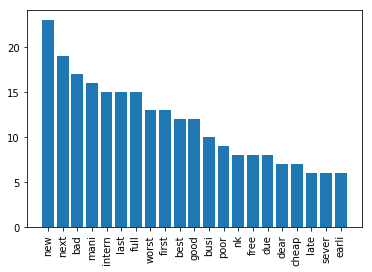

In [23]:
# plot bar chart
# frequency type can be NUM, NOUN, VERB and ...
def plot_by_type(freq_type, showAll = False, top_count = 20):
    wordsdict = get_sorted_frequency(freq_type, showAll, top_count)
    
    plt.bar(range(len(wordsdict)), wordsdict.values(), align='center')
    plt.xticks(range(len(wordsdict)), wordsdict.keys(), rotation='vertical')
    plt.show()
    
plot_by_type('ADJ', False, 20)

## I have provided some tools for checking out the frequency, word, and word type.

## Pre-processing has already been done, the preprocessing step contains the following:

    1. translation to english via google translation (many of the strings are bahasa melayu)
    2. string tokenization
    3. to lower case
    4. punctuations removal (.,?! and etc...)
    5. stopword removal (I, and, you and etc...)
    6. part of speech tagging (NOUN, VERB, NUM, ADJ, ADV, PRT and etc...)
    
## now entities and words has been extracted, time for sentimental analysis at sentence level

#### we first try to see if there is any interesting common adjectives or words that is commonly used for a certain entity

In [24]:
# group entity with their common words (example: baggage -> adjectives('lost', 'slow', 'terrible')
tag_of_interests = ['ADJ', 'VERB', 'NOUN', 'NUM', 'ADV']

# group entity is a dictionary containing {'baggage':{'lost':3, 'terrible':5}, ....}
group_entity = {}

for sent in sentence_clusters:
    entity = sent['entity']
    # entity is empty continue with loop
    if entity is '':
        continue
    
    # add entity to group entity
    if entity not in group_entity:
        group_entity[entity] = {'word':{}}
    
    idx = 0
    for word in sent['word']:
        
        # current word is in tag of interets then add it into the group entity
        if sent['type'][idx] in tag_of_interests:
            
            if word not in group_entity[entity]['word']:
                group_entity[entity]['word'][word] = 0
            
            group_entity[entity]['word'][word] = group_entity[entity]['word'][word] + 1

        idx = idx + 1
        
for elem in group_entity:
    print("Entity Name: " + elem)
    
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    tuples = []
    for key in sorted_keys:
        tuples.append((key, group_entity[elem]['word'][key]))
        #print('entity : ' + key + " " + str(group_entity[elem]['word'][key]))
    print(tuples)

Entity Name: malindo air
[('air', 220), ('email', 36), ('time', 34), ('fli', 28), ('cancel', 26), ('get', 24), ('call', 23), ('price', 23), ('ticket', 22), ('tri', 21), ('take', 20), ('hour', 19), ('ing', 18), ('busi', 17), ('dont', 17), ('refund', 17), ('even', 15), ('one', 15), ('address', 15), ('repli', 15), ('need', 15), ('number', 14), ('never', 14), ('back', 14), ('messag', 13), ('worst', 13), ('3', 13), ('got', 13), ('respons', 13), ('still', 13), ('go', 13), ('answer', 12), ('day', 12), ('2', 12), ('work', 12), ('mani', 11), ('new', 11), ('contact', 11), ('use', 11), ('first', 11), ('ever', 10), ('told', 10), ('know', 10), ('1', 10), ('sent', 9), ('2017', 9), ('alreadi', 9), ('plane', 9), ('famili', 9), ('made', 9), ('inform', 9), ('good', 9), ('passeng', 9), ('next', 9), ('wait', 9), ('peopl', 9), ('alway', 8), ('chang', 8), ('phone', 8), ('almost', 8), ('bad', 8), ('hope', 8), ('miss', 8), ('realli', 8), ('kl', 8), ('give', 8), ('full', 8), ('reschedul', 7), ('plan', 7), ('sa

#### sentiment analysis using SentimentIntensityAnalyzer from nltk.sentiment.vader

In [25]:
# -> each sentence, evaluate adjectives and count how many happy, angry, neutral
# -> each sentence, determine if it is happy, angry or neutral
# sentence_sentiment will contain data in format of [{neg_count:5, pos_count:5, neu_count:2
# , neg:[negative words..], pos:[positive words..], neu:[neutral words..]}]
sentence_sentiment = []

# also keep a list of lexicon
neg_lexicon = ['uncivil', 'neg', 'superbad', 'pathet', 'sever', 'last', 'unhappi', 'unabl', 'irrespons',
          'horribl', 'cancel', 'inconveni', 'joker', 'shock', 'problem', 'delay', 'lost', 'doesnt',
            'apolog']

sid = SentimentIntensityAnalyzer()

for sent in sentence_clusters:
    
    entity = sent['entity']
    if entity is '':
        continue
    
    # lists of positive, neutral or negative words
    pos_word_list=[]
    neu_word_list=[]
    neg_word_list=[]
    polarity_list=[]
    word_list=[]
    
    idx = 0
    for word in sent['word']:
        
        #print(word + " " + sent['type'][idx])
        
        # current word is in tag of interets then add it into the group entity
        if sent['type'][idx] not in tag_of_interests:
            continue
        
        if word in neg_lexicon:
            neg_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            pos_word_list.append(word)
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)     
        
        word_list.append(word)
        polarity_list.append(sid.polarity_scores(word)['compound'])
        
        idx = idx + 1
    
    # append the sentence's count, and its sentimental words
    sentence_sentiment.append({'pos_count':len(pos_word_list), 'neg_count':len(neg_word_list), 
                               'neu_count':len(neu_word_list), 'pos':pos_word_list, 'neg':neg_word_list, 
                               'neu':neu_word_list, 'pol':polarity_list, 'word':word_list})

# count how many sentences is negative, neutral or positive
neu_count = 0
pos_count = 0
neg_count = 0


for idx in range(0, len(sentence_sentiment)):

    if sentence_sentiment[idx]['neg'] > sentence_sentiment[idx]['pos']:
        neg_count = neg_count + 1
    elif sentence_sentiment[idx]['neg'] < sentence_sentiment[idx]['pos']:
        pos_count = pos_count + 1
    else:
        neu_count = neu_count + 1
        
print("negative sentences : " + str(neg_count))
print("positive sentences : " + str(pos_count))
print("neutral sentences : " + str(neu_count))

negative sentences : 140
positive sentences : 45
neutral sentences : 817


#### print out and summarize the sentiment in a nice view

In [26]:
for idx in range(0, len(sentence_sentiment)):
    print('sentence : ' + sentence_clusters[idx]['sentence'])
    print('negative sentiment count : ' + str(sentence_sentiment[idx]['neg_count']))
    print('positive sentiment count : ' + str(sentence_sentiment[idx]['pos_count']))
    print('neutral count : ' + str(sentence_sentiment[idx]['neu_count']))
    
    print('negative words')
    print(sentence_sentiment[idx]['neg'])
    print('positive words')
    print(sentence_sentiment[idx]['pos'])
    print('neutral words')
    print(sentence_sentiment[idx]['pos'])
    
    print('words')
    print(sentence_sentiment[idx]['word'])
    print('polarity')
    print(sentence_sentiment[idx]['pol'])

sentence : 00   od2305 kbr  22jun18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm2rm000   od2305 kbr  02may18 moved to od2303 0820hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm3rm000   od2304  kbr 28apr18 moved to od2302 0645hourswe apologize for any inconvenience caused message sent by call centre 60378415388 8am10pm
negative sentiment count : 6
positive sentiment count : 0
neutral count : 40
negative words
['apolog', 'inconveni', 'apolog', 'inconveni', 'apolog', 'inconveni']
positive words
[]
neutral words
[]
words
['00', 'od2305', 'kbr', '22jun18', 'move', 'od2303', '0820hoursw', 'apolog', 'inconveni', 'caus', 'messag', 'sent', 'call', 'centr', '60378415388', '8am10pm2rm000', 'od2305', 'kbr', '02may18', 'move', 'od2303', '0820hoursw', 'apolog', 'inconveni', 'caus', 'messag', 'sent', 'call', 'centr', '60378415388', '8am10pm3rm000', 'od2304', 'kbr', '28apr18', 'move', '

[]
words
['ye', 'agre']
polarity
[0.0, 0.0]
sentence :  they said their hotel is fully  ed did not offer lounge access at     or showed even a little remorse about this the managers at both the delhi   and the     were particularly rude and amused and nothing was done to atleast assist the senior citizens when we were supposed to land at 12pm in   we will be landing at 930pm thats also not sure  one entire day wasted along with the hotel  ings would never advice you guys to   via this   air i understand the   however they should atleast be apologetic  try to assist and offer some compensation for the same they dont have tie ups with any partner   air   n   air      air to transfer us to those  s as they fly to   every hour not recommended 
negative sentiment count : 0
positive sentiment count : 0
neutral count : 39
negative words
[]
positive words
[]
neutral words
[]
words
['said', 'hotel', 'fulli', 'offer', 'loung', 'access', 'show', 'even', 'littl', 'remors', 'manag', 'delhi', 'parti

[]
words
['dont', 'think', 'understand', 'mean']
polarity
[0.0, 0.0, 0.0, 0.0]
sentence : food   very bad
negative sentiment count : 1
positive sentiment count : 0
neutral count : 1
negative words
['bad']
positive words
[]
neutral words
[]
words
['food', 'bad']
polarity
[0.0, -0.5423]
sentence : i hateyou 
negative sentiment count : 0
positive sentiment count : 0
neutral count : 1
negative words
[]
positive words
[]
neutral words
[]
words
['hatey']
polarity
[0.0]
sentence : why  is it that    air is not fair with the   system
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['air', 'fair', 'system']
polarity
[0.0, 0.3182, 0.0]
sentence : taking   from penang to new delhi we get 30 kg  but  from   to new  delhi it is only 20kg
negative sentiment count : 0
positive sentiment count : 0
neutral count : 10
negative words
[]
positive words
[]
neutral words
[]
words
['take', 'penang', 'new', 'delhi', 'get', 

['fortun', 'pegi', 'kak']
polarity
[0.0, 0.0, 0.0]
sentence :  we ended up going to   as the  s were back on on friday
negative sentiment count : 0
positive sentiment count : 0
neutral count : 4
negative words
[]
positive words
[]
neutral words
[]
words
['end', 'go', 'back', 'friday']
polarity
[0.0, 0.0, 0.0, 0.0]
sentence :  ed to fly on friday 1st december from brisbane to denpasar with a connecting   to  kpapan fingers crossed
negative sentiment count : 0
positive sentiment count : 0
neutral count : 10
negative words
[]
positive words
[]
neutral words
[]
words
['fli', 'friday', '1st', 'decemb', 'brisban', 'denpasar', 'connect', 'kpapan', 'finger', 'cross']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence : mine also   to denpasar in 1st dec
negative sentiment count : 0
positive sentiment count : 0
neutral count : 3
negative words
[]
positive words
[]
neutral words
[]
words
['denpasar', '1st', 'dec']
polarity
[0.0, 0.0, 0.0]
sentence :  happy sgt  profit sape beli

sentence :  i already callmessageemail but until today i never get any responses from   since jun 2017  xf0x9fx98x94 call     care center also no one answer always
negative sentiment count : 0
positive sentiment count : 0
neutral count : 6
negative words
[]
positive words
[]
neutral words
[]
words
['alreadi', 'callmessageemail', 'today', 'never', 'get', 'respons']
polarity
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
sentence :   air thanks for the response
negative sentiment count : 0
positive sentiment count : 0
neutral count : 2
negative words
[]
positive words
[]
neutral words
[]
words
['air', 'respons']
polarity
[0.0, 0.0]
sentence :   pls
negative sentiment count : 0
positive sentiment count : 0
neutral count : 1
negative words
[]
positive words
[]
neutral words
[]
words
['pl']
polarity
[0.0]
sentence : my first   flying   business   on 23917 from  penang od2106
negative sentiment count : 0
positive sentiment count : 0
neutral count : 6
negative words
[]
positive words
[]
neutral words
[]
word

In [27]:
# summarize every sentence based on entity (example: baggage -> sentiment_happy: 20, sentiment_angry:40)

for elem in group_entity:
    #print("Entity Name: " + elem)
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    
    for word in sorted_keys:
        
        if 'sentiment' not in group_entity[elem]:
            group_entity[elem]['sentiment'] = {}
        
        if word in neg_lexicon:
            group_entity[elem]['sentiment'][word] = "negative"
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            group_entity[elem]['sentiment'][word] = "negative"
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            group_entity[elem]['sentiment'][word] = "positive"
        else:
            group_entity[elem]['sentiment'][word] = "neutral"

#### summarize based on entity with non-neutral words (example: baggage -> [(lost, 20), (bad, 30), ...]

In [28]:
for entity in group_entity:
    print("Entity name : " + entity)
    tuples = []
    for word in group_entity[entity]['word']:
        if group_entity[entity]['sentiment'][word] is "neutral":
            continue
        tuples.append((word, group_entity[entity]['word'][word]))
    print(tuples)

Entity name : malindo air
[('apolog', 3), ('inconveni', 4), ('worst', 13), ('idiot', 1), ('cancel', 26), ('sever', 6), ('fun', 1), ('lost', 6), ('shock', 1), ('kind', 4), ('success', 2), ('unabl', 2), ('trust', 3), ('pain', 2), ('bad', 8), ('doesnt', 2), ('uncivil', 2), ('irrespons', 3), ('wow', 2), ('great', 4), ('last', 6), ('funniest', 1), ('fraud', 3), ('problem', 2), ('cancer', 1), ('pathet', 4), ('love', 6), ('champion', 1), ('destroy', 2), ('unhappi', 1), ('free', 6), ('win', 2), ('best', 6), ('hate', 2), ('cheer', 1), ('cheater', 2), ('hell', 1), ('horribl', 2), ('disgust', 1), ('danger', 1), ('scam', 1), ('reward', 2), ('perfect', 2), ('fail', 1), ('award', 1)]
Entity name : class
[('last', 2)]
Entity name : customer service
[('cancel', 1), ('success', 2), ('worst', 5), ('superbad', 1), ('bad', 5), ('fail', 1), ('best', 3), ('great', 1), ('unabl', 1), ('lost', 3), ('horribl', 2), ('pathet', 2), ('unhappi', 2), ('brilliant', 1), ('last', 2), ('rotten', 1), ('win', 1)]
Entity na

#### summarize based on entity (example: baggage -> sentiment_happy: 20, sentiment_angry:40)

In [31]:
entity_path = open("../output/analysis output/fb_aspect_sentiments.csv", "w", encoding="utf-8")
entity_path.write('entity,pos,neg,neu,pos_proportion,neg_proportion\n')

for elem in group_entity:
    #print("Entity Name: " + elem)
    sorted_keys = sorted(group_entity[elem]['word'], key=group_entity[elem]['word'].get, reverse = True)
    
    pos = 0
    neg = 0
    neu = 0
    
    for word in sorted_keys:
        
        if word in neg_lexicon:
            neg = neg + 1
        elif (sid.polarity_scores(word)['compound']) >= 0.5:
            neg = neg + 1
        elif (sid.polarity_scores(word)['compound']) <= -0.5:
            pos = pos + 1
        else:
            neu = neu + 1
    
    count = pos+neg
    
    if count == 0:
        continue
    
    entity_path.write(elem+','+str(pos)+','+str(neg)+','+str(neu)+','+str(pos/count)
                      +','+str(neg/count)+'\n')
    
    print('entity : ' + elem)
    print('positive : ' + str(pos) + ' negative : ' + str(neg) + ' neutral : ' + str(neu))

entity_path.close()

entity : malindo air
positive : 14 negative : 31 neutral : 1311
entity : class
positive : 0 negative : 1 neutral : 70
entity : customer service
positive : 4 negative : 13 neutral : 423
entity : departure
positive : 0 negative : 3 neutral : 69
entity : flight
positive : 2 negative : 6 neutral : 360
entity : baggage
positive : 1 negative : 4 neutral : 99
entity : airport
positive : 0 negative : 5 neutral : 206
entity : tourism hotspot
positive : 2 negative : 6 neutral : 614
entity : service
positive : 0 negative : 2 neutral : 49
entity : book
positive : 0 negative : 4 neutral : 201
entity : time
positive : 1 negative : 1 neutral : 15
entity : price
positive : 0 negative : 1 neutral : 73
